In [1]:

import cv2
import numpy as np
import copy
import math
#from appscript import app

# Environment:
# OS    : Mac OS EL Capitan
# python: 3.5
# opencv: 2.4.13

# parameters
cap_region_x_begin=0.5  # start point/total width
cap_region_y_end=0.8  # start point/total width
threshold = 60  #  BINARY threshold
blurValue = 41  # GaussianBlur parameter
bgSubThreshold = 50
learningRate = 0

# variables
isBgCaptured = 0   # bool, whether the background captured
triggerSwitch = Fals

NameError: name 'Fals' is not defined

In [2]:
triggerSwitch = False

In [3]:
camera = cv2.VideoCapture(0)
camera.set(10,200)
cv2.namedWindow('trackbar')

In [4]:
ret, frame = camera.read()

In [5]:
from matplotlib import pyplot as plt



In [6]:
plt.show(frame)

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

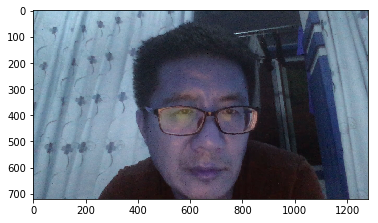

In [7]:
plt.imshow(frame)

In [8]:
bgModel = cv2.createBackgroundSubtractorMOG2(0, bgSubThreshold)

In [9]:
frame = cv2.bilateralFilter(frame, 5, 50, 100) 

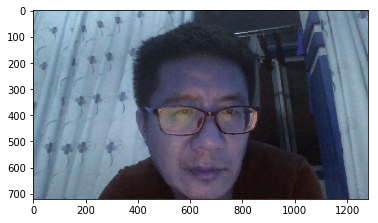

In [10]:
plt.imshow(frame)

In [11]:
frame = cv2.flip(frame, 1)

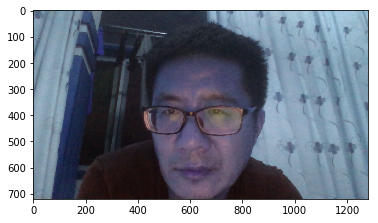

In [12]:
plt.imshow(frame)

In [13]:
cv2.rectangle(frame, (int(cap_region_x_begin * frame.shape[1]), 0),
                 (frame.shape[1], int(cap_region_y_end * frame.shape[0])), (255, 0, 0), 2)

array([[[ 99, 122, 141],
        [ 99, 123, 142],
        [100, 123, 142],
        ...,
        [255,   0,   0],
        [255,   0,   0],
        [255,   0,   0]],

       [[ 98, 121, 140],
        [ 97, 121, 139],
        [ 99, 123, 142],
        ...,
        [255,   0,   0],
        [255,   0,   0],
        [255,   0,   0]],

       [[ 95, 120, 138],
        [ 94, 119, 138],
        [ 96, 121, 140],
        ...,
        [149, 186, 205],
        [149, 185, 204],
        [255,   0,   0]],

       ...,

       [[113, 135, 145],
        [112, 134, 144],
        [112, 133, 144],
        ...,
        [115, 139, 160],
        [115, 138, 159],
        [115, 137, 158]],

       [[114, 135, 145],
        [113, 135, 145],
        [112, 133, 143],
        ...,
        [115, 139, 160],
        [114, 138, 159],
        [115, 137, 159]],

       [[115, 136, 146],
        [113, 134, 144],
        [112, 133, 143],
        ...,
        [115, 140, 161],
        [115, 138, 159],
        [114, 138, 159]]

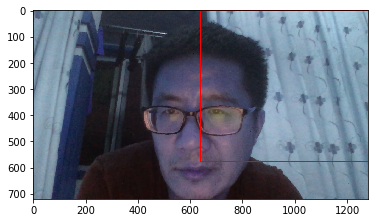

In [14]:
plt.imshow(frame)

In [15]:
def removeBG(frame):
    fgmask = bgModel.apply(frame,learningRate=learningRate)
    # kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (3, 3))
    # res = cv2.morphologyEx(fgmask, cv2.MORPH_OPEN, kernel)

    kernel = np.ones((3, 3), np.uint8)
    fgmask = cv2.erode(fgmask, kernel, iterations=1)
    res = cv2.bitwise_and(frame, frame, mask=fgmask)
    return res

In [16]:
img = removeBG(frame)

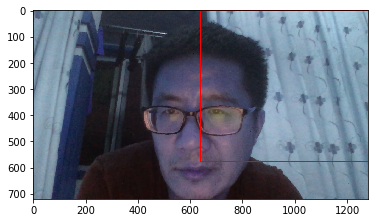

In [17]:
plt.imshow(img)

In [18]:
img = img[0:int(cap_region_y_end * frame.shape[0]),
                    int(cap_region_x_begin * frame.shape[1]):frame.shape[1]]

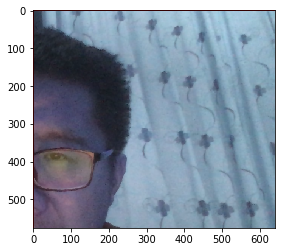

In [19]:
plt.imshow(img)

In [20]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

In [21]:
blur = cv2.GaussianBlur(gray, (blurValue, blurValue), 0)

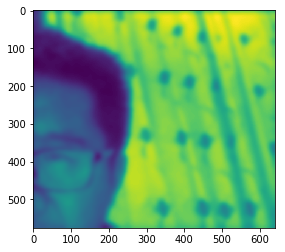

In [22]:
plt.imshow(blur)

In [23]:
ret, thresh = cv2.threshold(blur, threshold, 255, cv2.THRESH_BINARY)

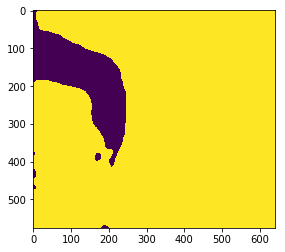

In [24]:
plt.imshow(thresh)

In [25]:
thresh1 = copy.deepcopy(thresh)

In [26]:
_,contours, hierarchy = cv2.findContours(thresh1, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

In [27]:
length = len(contours)

In [30]:
if length > 0:
            for i in range(length):  # find the biggest contour (according to area)
                temp = contours[i]
                area = cv2.contourArea(temp)
                if area > maxArea:
                    maxArea = area
                    ci = i

            res = contours[ci]
            hull = cv2.convexHull(res)
            drawing = np.zeros(img.shape, np.uint8)
            cv2.drawContours(drawing, [res], 0, (0, 255, 0), 2)
            cv2.drawContours(drawing, [hull], 0, (0, 0, 255), 3)

            isFinishCal,cnt = calculateFingers(res,drawing)
            if triggerSwitch is True:
                if isFinishCal is True and cnt <= 2:
                    print (cnt)

NameError: name 'calculateFingers' is not defined

In [29]:
maxArea = -1

In [31]:
if length > 0:
            for i in range(length):  # find the biggest contour (according to area)
                temp = contours[i]
                area = cv2.contourArea(temp)
                if area > maxArea:
                    maxArea = area
                    ci = i

            res = contours[ci]
            hull = cv2.convexHull(res)
            drawing = np.zeros(img.shape, np.uint8)
            cv2.drawContours(drawing, [res], 0, (0, 255, 0), 2)
            cv2.drawContours(drawing, [hull], 0, (0, 0, 255), 3)

            isFinishCal,cnt = calculateFingers(res,drawing)
            if triggerSwitch is True:
                if isFinishCal is True and cnt <= 2:
                    print (cnt)

NameError: name 'calculateFingers' is not defined

In [32]:
kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(3,3))

In [33]:
fgbg = cv2.BackgroundSubtractorMOG()

AttributeError: module 'cv2.cv2' has no attribute 'BackgroundSubtractorMOG'

In [34]:
bgModel = cv2.createBackgroundSubtractorMOG()

AttributeError: module 'cv2.cv2' has no attribute 'createBackgroundSubtractorMOG'

In [35]:
print(bgModel)

<BackgroundSubtractorMOG2 0x112f455f0>


In [36]:
(grabbed, frame) = camera.read()

In [37]:
print(grabbed)

True


In [38]:
f

array([[  0,   0,   0, ..., 127, 127, 127],
       [127, 127, 127, ..., 127, 127, 127],
       [127, 127, 127, ...,   0,   0, 127],
       ...,
       [127, 127, 127, ..., 127, 127, 127],
       [127, 127, 127, ..., 127, 127, 127],
       [127, 127, 127, ..., 127, 127, 127]], dtype=uint8)

In [39]:
(grabbed, frame) = camera.read()

In [40]:
fgmask=bgModel.apply(frame)

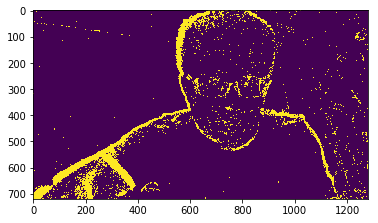

In [41]:
plt.imshow(fgmask)

In [42]:
fgmask = cv2.morphologyEx(fgmask, cv2.MORPH_OPEN, kernel)

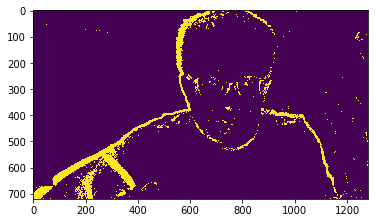

In [43]:
plt.imshow(fgmask)